In [28]:
!pip install pandas sqlalchemy matplotlib

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ab/63/966db1321a0ad55df1d1fe51505d2cdae191b84c907974873817b0a6e849/pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for sqlalchemy from https://files.pythonhosted.org/packages/74/9a/eec023807ae78e83342567303916b34a348d9d40703e7cef5dfb1e3635b6/SQLAlchemy-2.0.30-cp311-cp311-win_amd64.whl.metadata
  Using cached SQLAlchemy-2.0.30-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c6/c8/6936e8c7b279a5abac82f399d8d72ac25da530cf5f78a0e40063e492558c/matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for greenlet!=0.4.17 from https://files.pythonhosted.org/packages/47/79/26d54d7d700ef65b689fc2665a40846d13e834da0486674a8d4f0f371a47/greenlet-3.0.3-cp311-cp311-win_amd64.whl.metadata


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Database connection details
db_username = 'postgres'
db_password = 'Brainstorm99&&'
db_host = '127.0.0.1'
db_port = '5432'
db_name = 'Instacart_Analytics'

# Create a connection to the PostgreSQL database
engine = create_engine(f'postgresql+psycopg2://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

In [36]:
# Load data from tables into Pandas DataFrames
products_df = pd.read_sql("SELECT * FROM public.products", con=engine)
aisles_df = pd.read_sql("SELECT * FROM public.aisles", con=engine)
departments_df = pd.read_sql("SELECT * FROM public.departments", con=engine)

In [44]:
# Count the number of products per aisle
products_per_aisle = products_df.groupby('aisle_id').size().reset_index(name='count')
with pd.option_context('display.max_rows', None):
    print(products_per_aisle)

     aisle_id  count
0           1    146
1           2    271
2           3    832
3           4    543
4           5    409
5           6    548
6           7    100
7           8    297
8           9    399
9          10    218
10         11    427
11         12    123
12         13    317
13         14    159
14         15     80
15         16     86
16         17    623
17         18     12
18         19    375
19         20    565
20         21    891
21         22    816
22         23    316
23         24    382
24         25    525
25         26    680
26         27    385
27         28    232
28         29    229
29         30    257
30         31    675
31         32     32
32         33    169
33         34    229
34         35     82
35         36    150
36         37   1091
37         38    880
38         39     54
39         40    473
40         41    499
41         42    189
42         43    195
43         44    113
44         45   1246
45         46    168
46         47

In [38]:
# Merge products with aisles and departments
merged_df = products_df.merge(aisles_df, on='aisle_id').merge(departments_df, on='department_id')
print(merged_df.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id                       aisle department  
0             19               cookies cakes     snacks  
1             13           spices seasonings     pantry  
2              7                         tea  beverages  
3              1                frozen meals     frozen  
4             13  marinades meat preparation     pantry  


In [37]:
# Count the number of products per department
products_per_department = merged_df.groupby('department').size().reset_index(name='count')
print(products_per_department)

         department  count
0           alcohol   1054
1            babies   1081
2            bakery   1516
3         beverages   4365
4         breakfast   1115
5              bulk     38
6      canned goods   2092
7        dairy eggs   3449
8              deli   1322
9   dry goods pasta   1858
10           frozen   4007
11        household   3085
12    international   1139
13     meat seafood    907
14          missing   1258
15            other    548
16           pantry   5371
17    personal care   6563
18             pets    972
19          produce   1684
20           snacks   6264


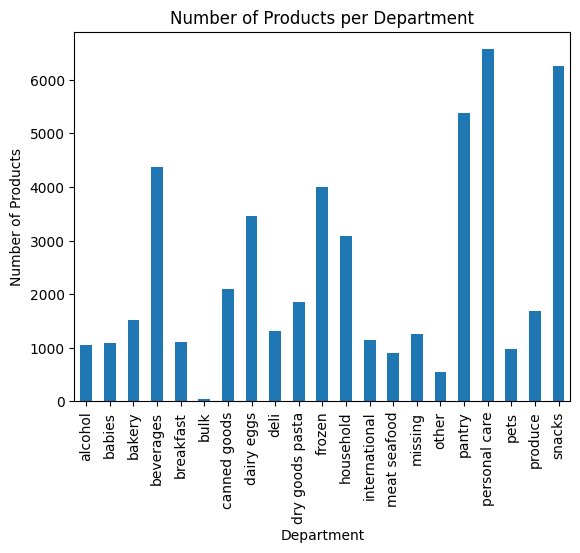

In [40]:
# Visualization with Matplotlib
# Plot the number of products per department
products_per_department.plot(kind='bar', x='department', y='count', legend=False)
plt.title('Number of Products per Department')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.show()